## Sistemas Inteligentes para a Bioinformática

Notebook criado por:
- Ana Carolina Inácio, PG45459
- Ana Rafaela Pereira, PG45461
- Mariana Coelho, PG45967

Dataset utilizado: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# About this dataset
- age : age of the patient
- sex : sex of the patient
- cp : chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol: cholesterol in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl)
  - 1 = true
  - 0 = false
- restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh: maximum heart rate achieved
- exng: exercise induced angina
  - 1 = yes
  - 0 = no
- oldpeak: ST depression induced by exercise relative to rest
- slp: the slope of the peak exercise ST segment
  - 0 = unsloping
  - 1 = flat
  - 2 = downsloping
- caa: number of major vessels (0-3)
- thall : thalassemia
  - 0 = null
  - 1 = fixed defect
  - 2 = normal
  - 3 = reversable defect
- output: diagnosis of heart disease (angiographic disease status)
  - 0: < 50% diameter narrowing. less chance of heart disease
  - 1: > 50% diameter narrowing. more chance of heart disease

In [ ]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sn
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Data pre-processing

In [ ]:
# read heart.csv file
filepath_heart = '/content/drive/MyDrive/Mestrado em Bioinformática/2º Ano/Sistemas Inteligentes para a Bioinformática/Trabalho/Heart failure/heart.csv'

df_heart = pd.read_csv(filepath_heart)
df_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# see 5 first rows
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# get shape of heart df
df_heart.shape

(303, 14)

In [ ]:
# read o2Saturation.csv file
filepath_o2 = '/content/drive/MyDrive/Mestrado em Bioinformática/2º Ano/Sistemas Inteligentes para a Bioinformática/Trabalho/Heart failure/o2Saturation.csv'

df_o2 = pd.read_csv(filepath_o2)
df_o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [ ]:
# give a label to o2 dataset
df_o2.rename(columns={"98.6": "o2_saturation"}, inplace=True)

df_o2

,o2_saturation
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [ ]:
# get shape of o2 saturation df
df_o2.shape

(3585, 1)

In [ ]:
# merge the two datasets
dataset = pd.concat([df_heart,df_o2], axis=1)
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [ ]:
# see first 5 rows
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [ ]:
# see the last 5 rows
dataset.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [ ]:
# check the type of variables
dataset.dtypes

age              float64
sex              float64
cp               float64
trtbps           float64
chol             float64
fbs              float64
restecg          float64
thalachh         float64
exng             float64
oldpeak          float64
slp              float64
caa              float64
thall            float64
output           float64
o2_saturation    float64
dtype: object

In [ ]:
# search for NaN values
dataset.isnull().sum()

age              3282
sex              3282
cp               3282
trtbps           3282
chol             3282
fbs              3282
restecg          3282
thalachh         3282
exng             3282
oldpeak          3282
slp              3282
caa              3282
thall            3282
output           3282
o2_saturation       0
dtype: int64

In [ ]:
# remove NaN values
data = dataset.dropna()
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,97.5
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,97.5
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,97.5
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,97.5


In [ ]:
# get shape of the dataset
data.shape

(303, 15)

In [ ]:
# get the summary of the dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [ ]:
# check all data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trtbps         303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalachh       303 non-null    float64
 8   exng           303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slp            303 non-null    float64
 11  caa            303 non-null    float64
 12  thall          303 non-null    float64
 13  output         303 non-null    float64
 14  o2_saturation  303 non-null    float64
dtypes: float64(15)
memory usage: 37.9 KB


In [ ]:
# get list of co
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2_saturation'],
      dtype='object')

In [ ]:
# change order of columns
data = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'o2_saturation', 'output']]

data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2_saturation,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,98.6,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,98.6,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,98.6,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,98.1,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,97.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,97.5,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,97.5,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,97.5,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,97.5,0.0


In [ ]:
# scaling the data
array_data = preprocessing.scale(data)
data_scale = pd.DataFrame(array_data, index=data.index, columns=data.columns)

# Exploratory data analysis

In [ ]:
# get range of values of the variables
data.apply(lambda x: str(x.min()) + "---" + str(x.max()))

age                29.0---77.0
sex                  0.0---1.0
cp                   0.0---3.0
trtbps            94.0---200.0
chol             126.0---564.0
fbs                  0.0---1.0
restecg              0.0---2.0
thalachh          71.0---202.0
exng                 0.0---1.0
oldpeak              0.0---6.2
slp                  0.0---2.0
caa                  0.0---4.0
thall                0.0---3.0
o2_saturation      96.5---98.6
output               0.0---1.0
dtype: object

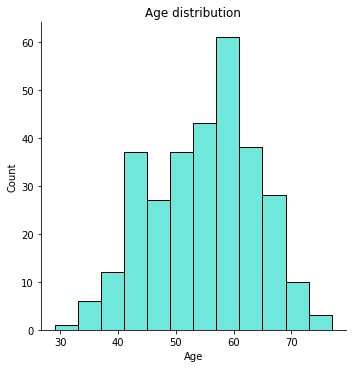

In [ ]:
# check the distribution of age
sn.displot(data=data, x="age", color="turquoise")
plt.xlabel("Age")
plt.title("Age distribution")
plt.show()

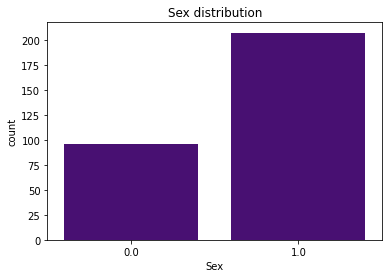

In [ ]:
# check the distribution of sex
sn.countplot(data=data, x="sex", color="indigo")
plt.xlabel("Sex")
plt.title("Sex distribution")
plt.show()

**age:** 1: male; 0: female

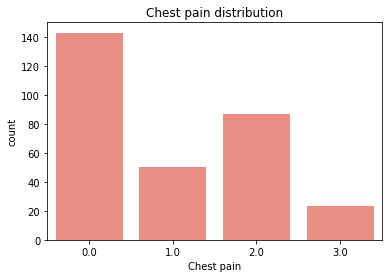

In [ ]:
# check the distribution of chest pain
sn.countplot(data=data, x="cp", color="salmon")
plt.xlabel("Chest pain")
plt.title("Chest pain distribution")
plt.show()

**chest pain:** 0: typical angina; 1: atypical angina; 2: non-anginal pain; 3: asymptomatic

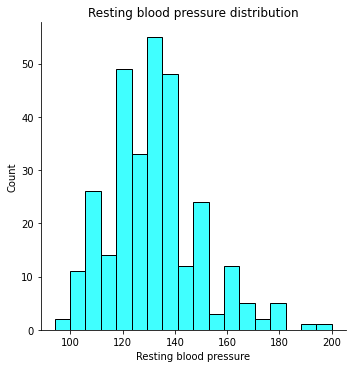

In [ ]:
# check the distribution of resting blood pressure
sn.displot(data=data, x="trtbps", color="aqua")
plt.xlabel("Resting blood pressure")
plt.title("Resting blood pressure distribution")
plt.show()

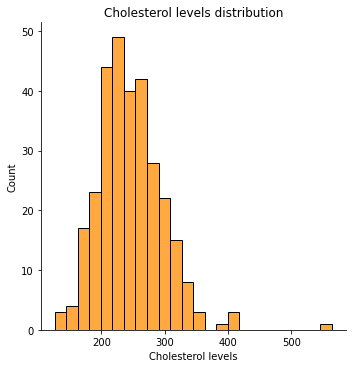

In [ ]:
# check the distribution of cholesterol
sn.displot(data=data, x="chol", color="darkorange")
plt.xlabel("Cholesterol levels")
plt.title("Cholesterol levels distribution")
plt.show()

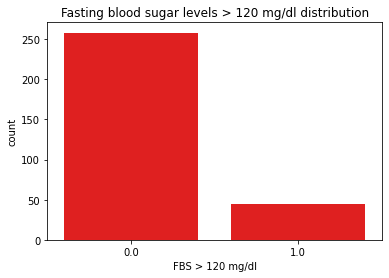

In [ ]:
# check the distribution of fasting blood sugar levels
sn.countplot(data=data, x="fbs", color="red")
plt.xlabel("FBS > 120 mg/dl")
plt.title("Fasting blood sugar levels > 120 mg/dl distribution")
plt.show()

**fasting blood sugar :** 1 = true; 0 = false

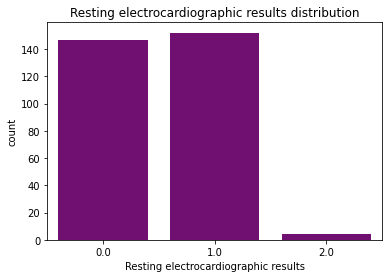

In [ ]:
# check the distribution of restecg
sn.countplot(data=data, x="restecg", color="purple")
plt.xlabel("Resting electrocardiographic results")
plt.title("Resting electrocardiographic results distribution")
plt.show()

**resting electrocardiographic results:** 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

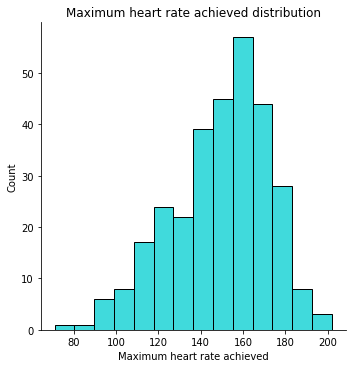

In [ ]:
# check the distribution of thalachh
sn.displot(data=data, x="thalachh", color="darkturquoise")
plt.xlabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved distribution")
plt.show()

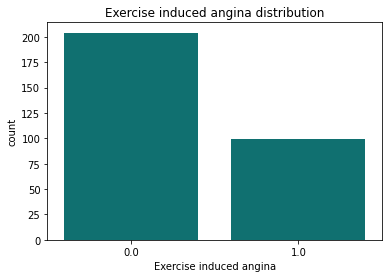

In [ ]:
# check the distribution of exng
sn.countplot(data=data, x="exng", color="teal")
plt.xlabel("Exercise induced angina")
plt.title("Exercise induced angina distribution")
plt.show()

**exercise induced angina:** 1: yes; 0: no

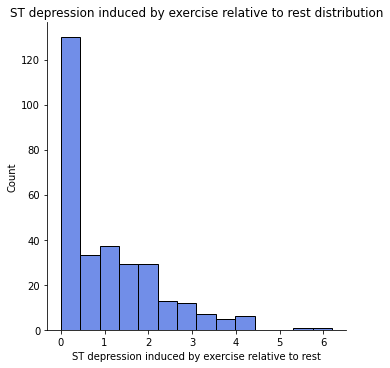

In [ ]:
# check the distribution of oldpeak
sn.displot(data=data, x="oldpeak", color="royalblue")
plt.xlabel("ST depression induced by exercise relative to rest")
plt.title("ST depression induced by exercise relative to rest distribution")
plt.show()

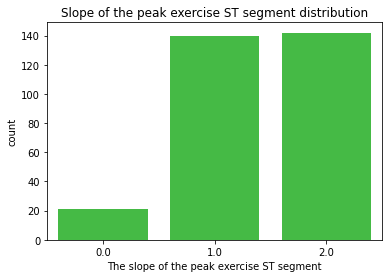

In [ ]:
# check the distribution of slp
sn.countplot(data=data, x="slp", color="limegreen")
plt.xlabel("The slope of the peak exercise ST segment")
plt.title("Slope of the peak exercise ST segment distribution")
plt.show()

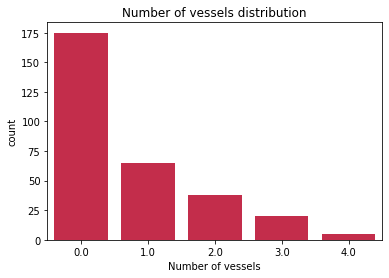

In [ ]:
# check the distribution of caa
sn.countplot(data=data, x="caa", color="crimson")
plt.xlabel("Number of vessels")
plt.title("Number of vessels distribution")
plt.show()

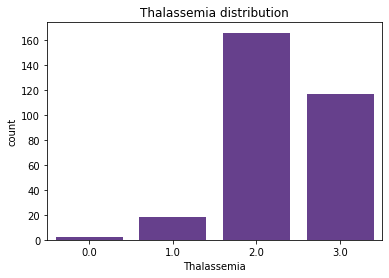

In [ ]:
# check the distribution of thall
sn.countplot(data=data, x="thall", color="rebeccapurple")
plt.xlabel("Thalassemia")
plt.title("Thalassemia distribution")
plt.show()

**thalassemia:** 0: null; 1: fixed defect; 2: normal; 3: reversable defect

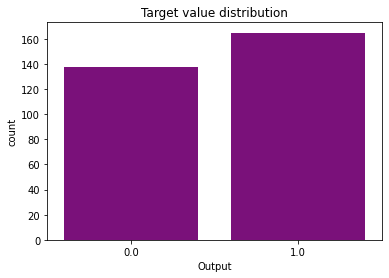

In [ ]:
# check the distribution of output (our target variable)
# 0 = less chance of heart attack; 1 = more chance of heart attack
sn.countplot(data=data, x="output", color="darkmagenta")
plt.xlabel("Output")
plt.title("Target value distribution")
plt.show()

**output (target variable):** 0: < 50% diameter narrowing. less chance of heart disease; 1: > 50% diameter narrowing. more chance of heart disease

In [ ]:
# analysis of the categorical variables
categorical_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
data_categorical = data.loc[:,categorical_var]
data_categorical

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
4,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
299,1.0,3.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
300,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0
301,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0


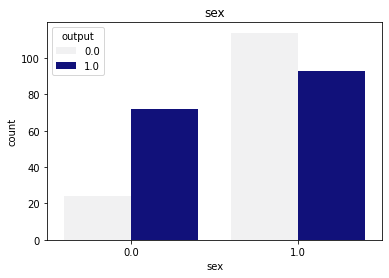

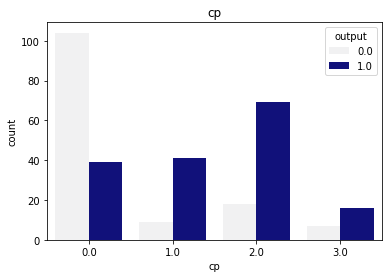

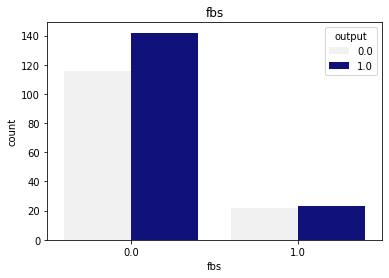

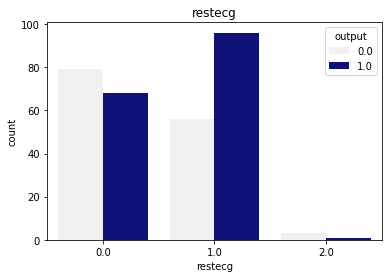

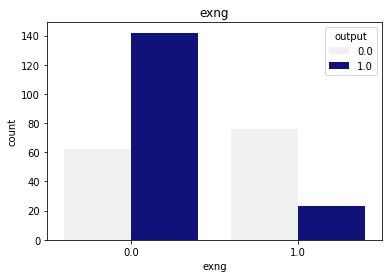

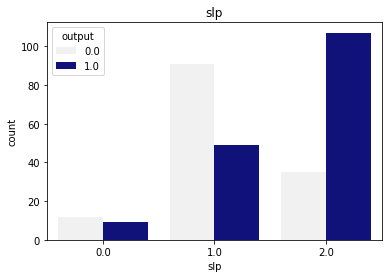

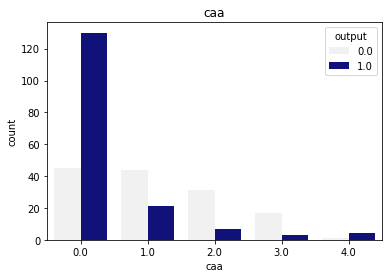

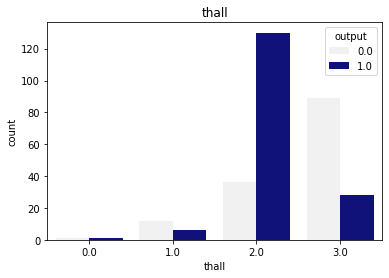

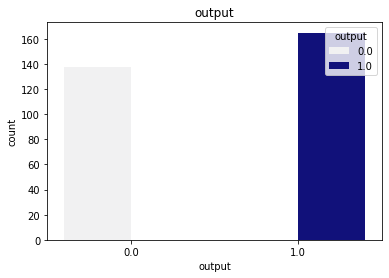

In [ ]:
# plotting the categorical variables against the target variable
for i in categorical_var:
    plt.figure()
    sn.countplot(x=i, data=data_categorical, hue="output", color="darkblue")
    plt.title(i)

In [ ]:
# analysis of the numeric variables
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak", 'o2_saturation']
data_numeric = data.loc[:,numeric_var]
data_numeric

,age,trtbps,chol,thalachh,oldpeak,o2_saturation
0,63.0,145.0,233.0,150.0,2.3,98.6
1,37.0,130.0,250.0,187.0,3.5,98.6
2,41.0,130.0,204.0,172.0,1.4,98.6
3,56.0,120.0,236.0,178.0,0.8,98.1
4,57.0,120.0,354.0,163.0,0.6,97.5
...,...,...,...,...,...,...
298,57.0,140.0,241.0,123.0,0.2,97.5
299,45.0,110.0,264.0,132.0,1.2,97.5
300,68.0,144.0,193.0,141.0,3.4,97.5
301,57.0,130.0,131.0,115.0,1.2,97.5


# Statistical tests and correlation

In [ ]:
# logarithmic transformation
log_data = np.log2(data)

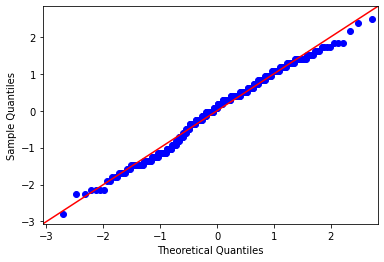

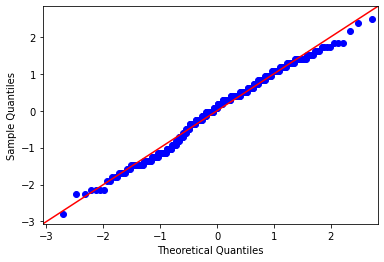

In [ ]:
# check if age follows a normal distribution
sm.qqplot(data_scale.age, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

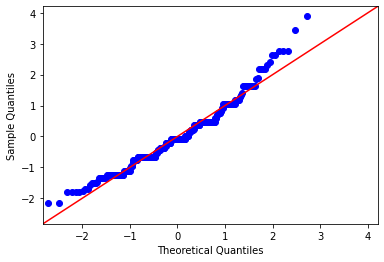

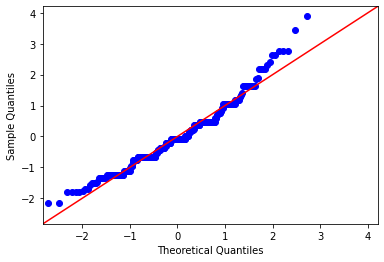

In [ ]:
# check if trtbps follows a normal distribution
sm.qqplot(data_scale.trtbps, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

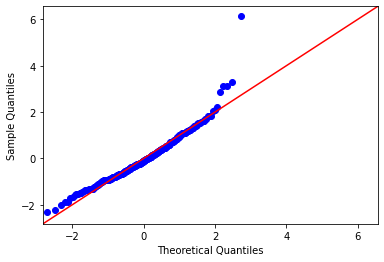

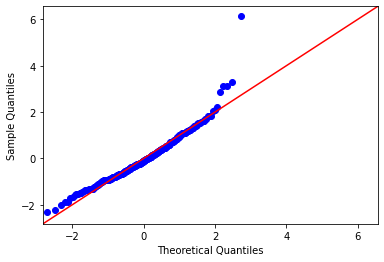

In [ ]:
# check if chol follows a normal distribution
sm.qqplot(data_scale.chol, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

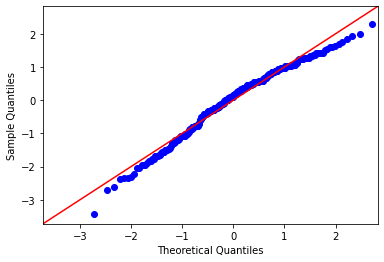

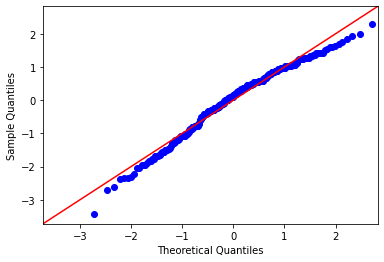

In [270]:
# check if thalachh follows a normal distribution
sm.qqplot(data_scale.thalachh, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

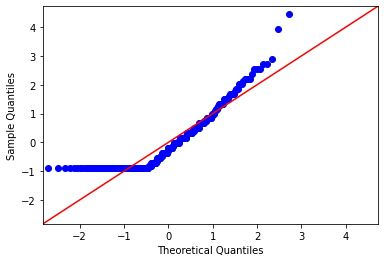

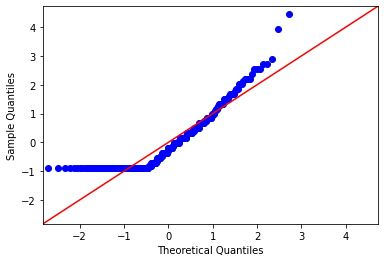

In [271]:
# check if oldpeak follows a normal distribution
sm.qqplot(data_scale.oldpeak, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

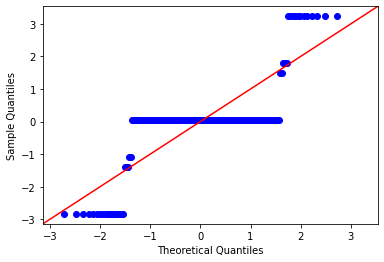

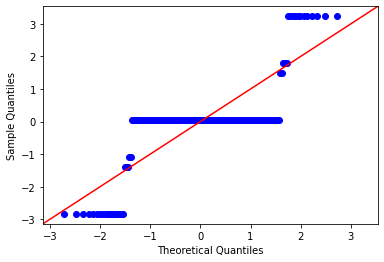

In [272]:
# check if o2_saturation follows a normal distribution
sm.qqplot(data_scale.o2_saturation, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

In [ ]:
# normality test - shapiro test
scipy.stats.shapiro(x=data_scale)
# H0 is rejected - the data is considered to be not normally distributed

ShapiroResult(statistic=0.972541868686676, pvalue=1.0842821882854865e-28)

In [ ]:
# creation of the correlation matrix
corr_matrix = data_categorical.corr(method='spearman')
corr_matrix

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
sex,1.000000,-0.062041,0.045032,-0.048389,0.141664,-0.025010,0.119368,0.250821,-0.280937
cp,-0.062041,1.000000,0.089775,0.065640,-0.418256,0.159478,-0.216006,-0.207840,0.460860
fbs,0.045032,0.089775,1.000000,-0.081508,0.025665,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.048389,0.065640,-0.081508,1.000000,-0.077399,0.113661,-0.097862,-0.010982,0.148612
exng,0.141664,-0.418256,0.025665,-0.077399,1.000000,-0.274475,0.162025,0.247113,-0.436757
slp,-0.025010,0.159478,-0.045786,0.113661,-0.274475,1.000000,-0.099901,-0.154886,0.371460
caa,0.119368,-0.216006,0.134513,-0.097862,0.162025,-0.099901,1.000000,0.189103,-0.457607
thall,0.250821,-0.207840,-0.006737,-0.010982,0.247113,-0.154886,0.189103,1.000000,-0.403299
output,-0.280937,0.460860,-0.028046,0.148612,-0.436757,0.371460,-0.457607,-0.403299,1.000000


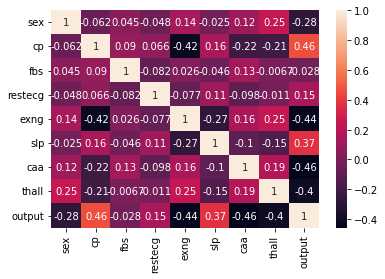

In [ ]:
# heatmap of the 
sn.heatmap(corr_matrix.iloc[:10,:10], annot=True)

As this dataset is a classification problem (supervised learning), we decided not to do the clustering and PCA analysis, since those techniques are used in unsupervised learning.

# Supervised learning

In [ ]:
# imports
from sklearn.model_selection import train_test_split